In [1]:
import pandas as pd
import numpy as np

C:\Users\admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_excel('C:/Users/admin/Desktop/Data Analysis Projects/Automate excel using chatgpt/sales_combined.xlsb')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,43470,0.547222,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,43532,0.436806,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,43527,0.557639,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,43492,0.856250,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,43504,0.442361,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
def convert_float_to_time(time_float):
    # Split the float into hours and minutes
    hours = int(time_float)
    minutes = int((time_float - hours) * 100)
    return pd.Timedelta(hours=hours, minutes=minutes)

df['Time'] = df['Time'].apply(convert_float_to_time)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Invoice ID               1000 non-null   object         
 1   Branch                   1000 non-null   object         
 2   City                     1000 non-null   object         
 3   Customer type            1000 non-null   object         
 4   Gender                   1000 non-null   object         
 5   Product line             1000 non-null   object         
 6   Unit price               1000 non-null   float64        
 7   Quantity                 1000 non-null   int64          
 8   Tax 5%                   1000 non-null   float64        
 9   Total                    1000 non-null   float64        
 10  Date                     1000 non-null   datetime64[ns] 
 11  Time                     1000 non-null   timedelta64[ns]
 12  Payment              

In [16]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,1970-01-01 00:00:00.000043510,0 days 01:03:42.960000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,1970-01-01 00:00:00.000043466,0 days 00:41:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,1970-01-01 00:00:00.000043489,0 days 00:52:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,1970-01-01 00:00:00.000043509,0 days 01:03:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,1970-01-01 00:00:00.000043532,0 days 01:16:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,1970-01-01 00:00:00.000043554,0 days 01:27:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,0 days 00:13:18.470032495,234.17651,0.000000,11.708825,1.71858


In [17]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [18]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Visualization

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total sales per branch

C:\Users\admin\AppData\Local\Temp\ipykernel_7640\975956154.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Branch', y='Total', data=df, estimator=sum, ci=None)


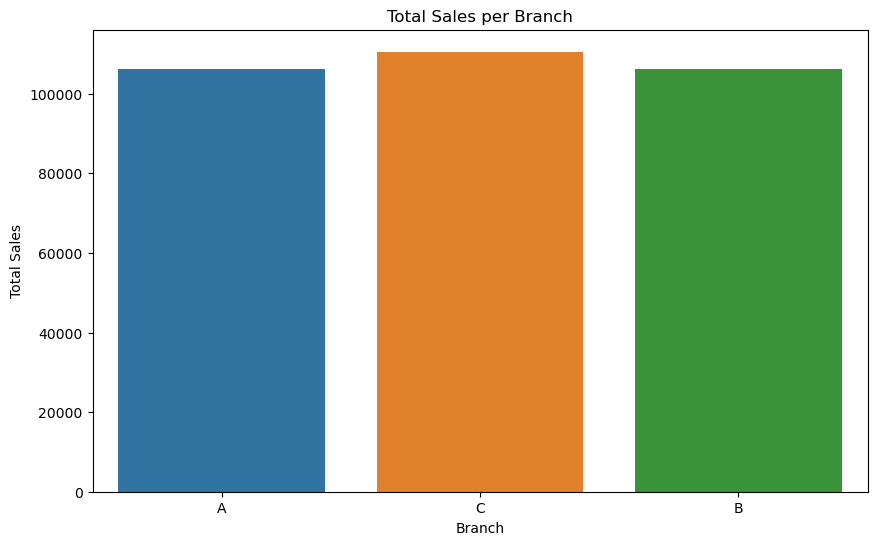

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total', data=df, estimator=sum, ci=None)
plt.title('Total Sales per Branch')
plt.ylabel('Total Sales')
plt.xlabel('Branch')
plt.show()

# Sales distribution by product line

C:\Users\admin\AppData\Local\Temp\ipykernel_7640\3832578749.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Total', data=df, estimator=sum, ci=None)


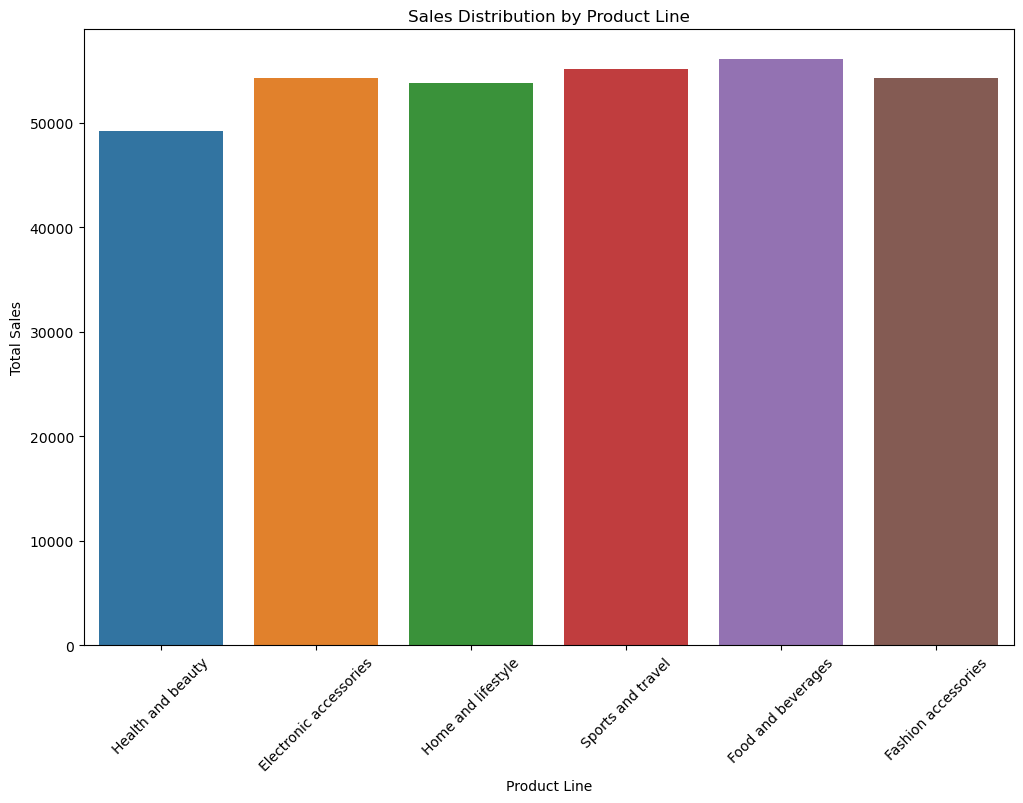

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Product line', y='Total', data=df, estimator=sum, ci=None)
plt.title('Sales Distribution by Product Line')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Product Line')
plt.show()

# Gender distribution of customers

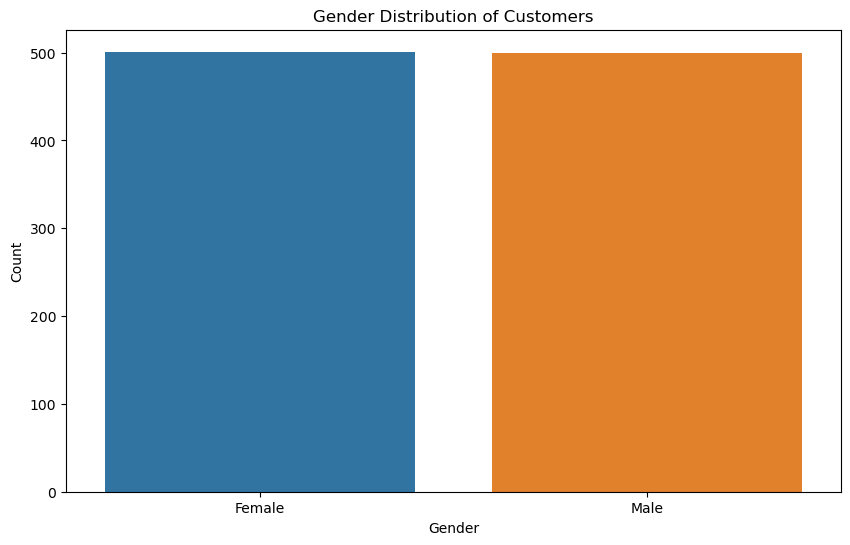

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Customers')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

# Distribution of unit prices

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


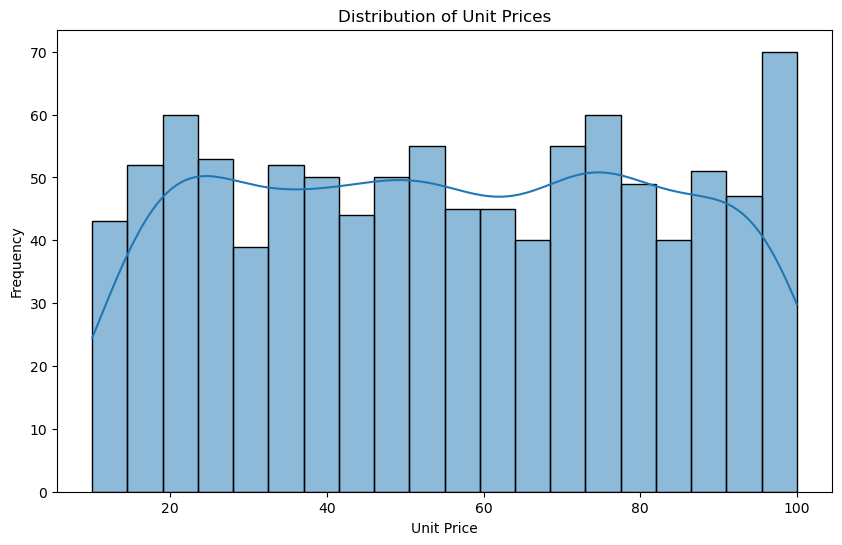

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Unit price'], bins=20, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of customer ratings

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


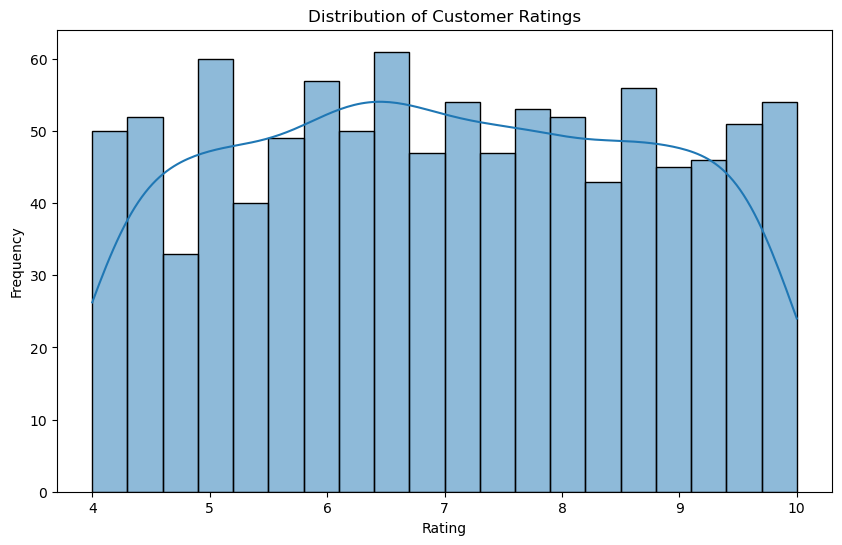

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Comparison of total sales amount by customer type



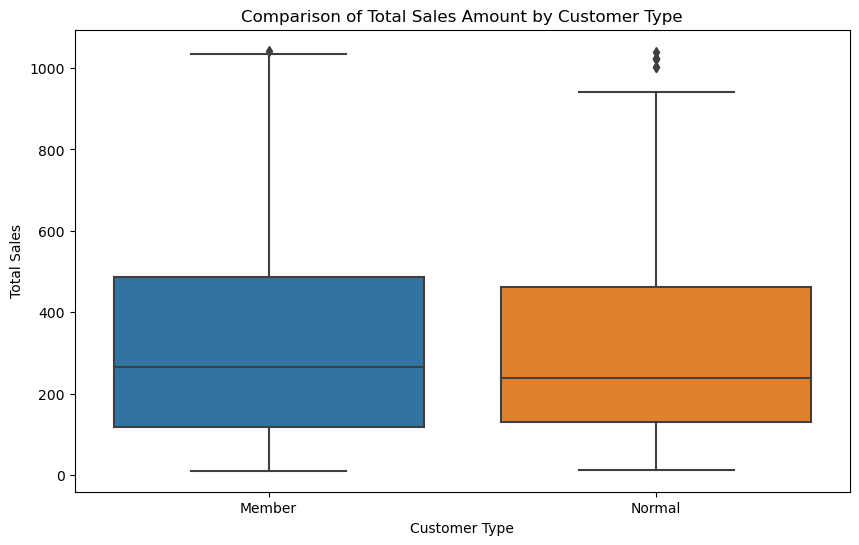

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer type', y='Total', data=df)
plt.title('Comparison of Total Sales Amount by Customer Type')
plt.ylabel('Total Sales')
plt.xlabel('Customer Type')
plt.show()

# Distribution of ratings across different product lines


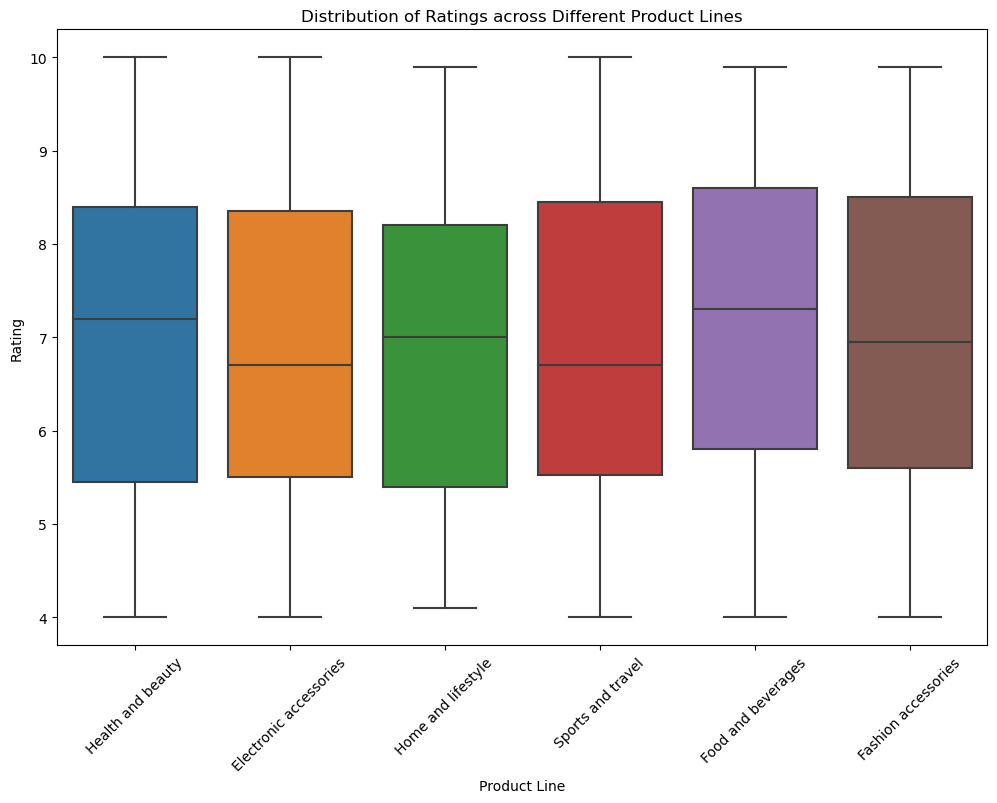

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product line', y='Rating', data=df)
plt.title('Distribution of Ratings across Different Product Lines')
plt.xticks(rotation=45)
plt.ylabel('Rating')
plt.xlabel('Product Line')
plt.show()

# Relationship between unit price and quantity


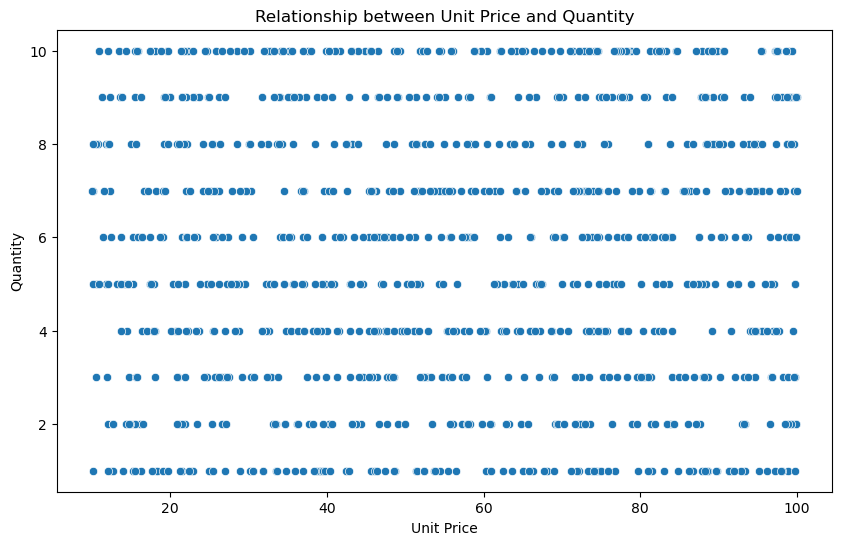

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit price', y='Quantity', data=df)
plt.title('Relationship between Unit Price and Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()

# Relationship between total amount and customer rating


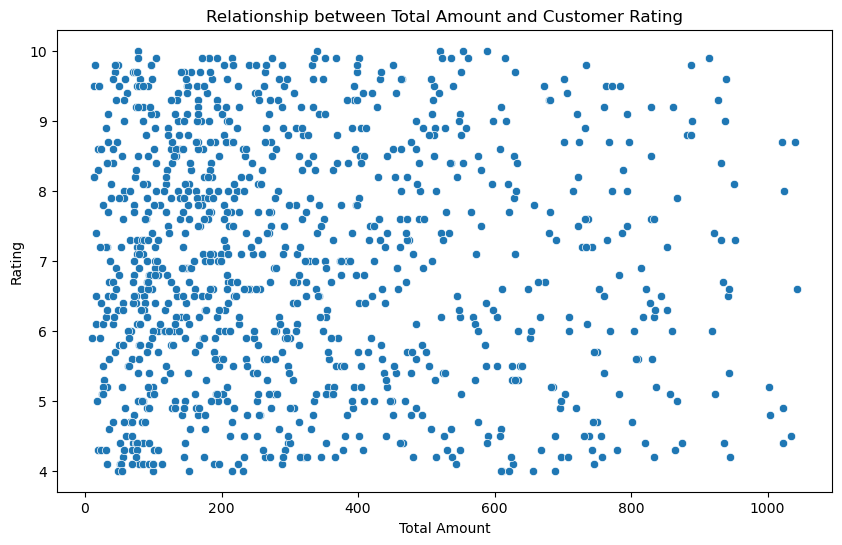

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Rating', data=df)
plt.title('Relationship between Total Amount and Customer Rating')
plt.xlabel('Total Amount')
plt.ylabel('Rating')
plt.show()